In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[47, 47], [186, 47], [186, 92], [47, 92]], 'Yhg-341-B']]


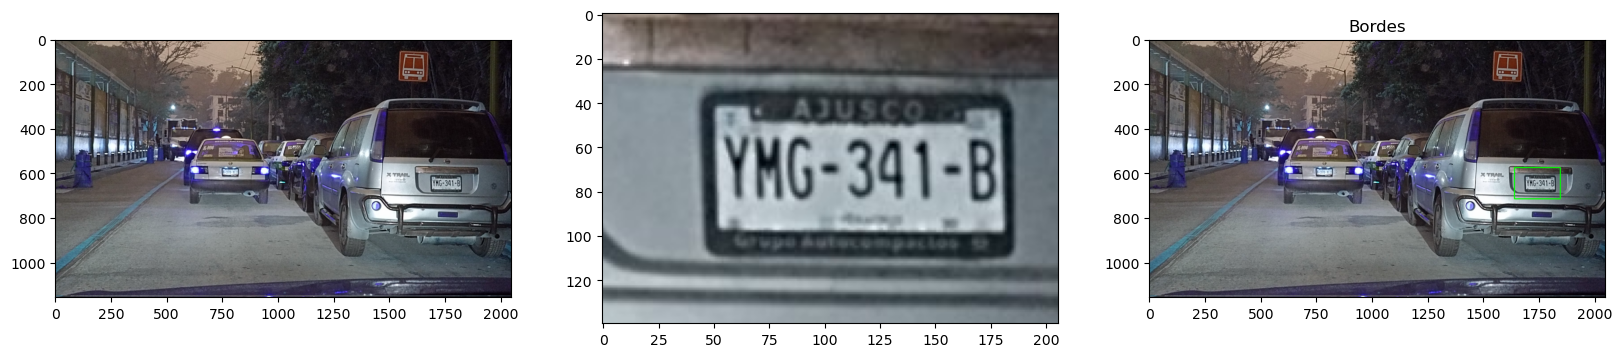

In [5]:
image = cv2.imread('C:\\Users\\ernes\\Documents\\Actividades\\Practicas\\Imagenes carros\\carro15.jpeg')

plt.figure(figsize=(20, 20))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

reader = easyocr.Reader(['en'])
result = reader.readtext(edged, paragraph=True)
for i in range (len(result)):
    if len(result[i][1])>= len(result[i-1][1]):
        coordenadas = result[i][0]
#punto1
coordenadas[0][0]-=50
coordenadas[0][1]-=50
#punto2
coordenadas[1][0]+=50
coordenadas[1][1]-=50
#punto3
coordenadas[2][0]+=50
coordenadas[2][1]+=50
#punto4
coordenadas[3][0]-=50
coordenadas[3][1]+=50

pts1 = np.float32([coordenadas[0],coordenadas[1],coordenadas[3], coordenadas[2]])

#pts1 = np.float32([[900-100, 1282-100], [1079+100, 1282-100],[900-100, 1496+100],[1079+100, 1496+100]])
pts2 = np.float32([[0,0],[coordenadas[1][0]-coordenadas[0][0],0],[0,coordenadas[3][1]-coordenadas[0][1]],
                   [coordenadas[1][0]-coordenadas[0][0],coordenadas[3][1]-coordenadas[0][1]]])

plt.subplot(1, 3, 1)
plt.imshow(image)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(image,M,(coordenadas[1][0]-coordenadas[0][0],coordenadas[3][1]-coordenadas[0][1]))
plt.subplot(1, 3, 2)
plt.imshow(dst)

placa = reader.readtext(dst, paragraph=True)
print(placa)
#coordenadas
res = cv2.rectangle(image, tuple(coordenadas[0]), tuple(coordenadas[2]), (0,255, 0), 3)
plt.subplot(1, 3, 3)
plt.title("Bordes")
plt.imshow(res)
